<a href="https://colab.research.google.com/github/Elvis102/30-Days-Of-Python/blob/master/Tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#funciones específicas de Sckit-learn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc

#para visualizar el arbol desde el formato .dot
from IPython.display import Image
from pydotplus import graph_from_dot_data


# 1. Lectura de datos y breve exploración

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Curso de Machine Learning_Buorbaki/Tarea_1/FraudeCanastas.csv')

df.head(10)

,ID,APPLE PRODUCTDESCRIPTION | SAMSUNG | MODEL90,AUDIO ACCESSORIES | AB AUDIO | AB AUDIO GO AIR TRUE WIRELESS BLUETOOTH IN-EAR H,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE 2ND GENERATI,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE 2ND,AUDIO ACCESSORIES | APPLE | 2021 APPLE AIRPODS WITH MAGSAFE CHARGING CASE 3RD,AUDIO ACCESSORIES | APPLE | AIRPODS PRO,AUDIO ACCESSORIES | APPLE | APPLE AIRPODS MAX,...,WOMEN S NIGHTWEAR | ANYDAY RETAILER | ANYDAY RETAILER LEOPARD PRINT JERSEY PY,WOMEN S NIGHTWEAR | RETAILER | RETAILER CLEO VELOUR JOGGER LOUNGE PANT,WOMEN S NIGHTWEAR | SOSANDAR | SOSANDAR ZEBRA PRINT PYJAMA BOTTOMS BLACK 10,Nb_of_items,total_of_items,costo_total,costo_medio_item,costo_item_max,costo_item_min,fraud_flag
0,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1299,649.500000,1299,0.0,1.0
1,195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3,3,4119,1373.000000,2470,0.0,1.0
2,217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,2806,1403.000000,2799,7.0,1.0
3,552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1206,603.000000,1199,7.0,1.0
4,854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,19,27,1807,66.925926,195,4.0,1.0
5,855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8,9,1263,140.333333,280,4.0,1.0
6,856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,942,471.000000,938,4.0,1.0
7,941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1199,599.500000,1199,0.0,1.0
8,1157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1206,603.000000,1199,7.0,1.0
9,1543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,936,468.000000,929,7.0,1.0


In [4]:
df.shape

(9319, 2457)

# 2. Preprocesamiento

## 2.1 Se eliminan las variables innecesarias

In [5]:
# Ver valores únicos(categorias) de cada variable
df.nunique()

ID                                                                                 9319
APPLE PRODUCTDESCRIPTION | SAMSUNG | MODEL90                                          2
AUDIO ACCESSORIES | AB AUDIO | AB AUDIO GO AIR TRUE WIRELESS BLUETOOTH IN-EAR H       2
AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE                     8
AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE 2ND GENERATI        8
                                                                                   ... 
costo_total                                                                        1639
costo_medio_item                                                                   2034
costo_item_max                                                                      540
costo_item_min                                                                      528
fraud_flag                                                                            2
Length: 2457, dtype: int64

In [ ]:
# Se eliminan las variables innecesarias
df = df.set_index('ID')

df.head(6)

## Creación de subconjuntos de entrenamiento y prueba

In [14]:
#Separar las etiquetas del conjunto de datos

y = df['fraud_flag']
X = df.drop('fraud_flag', axis=1)

In [27]:
# Dividir datos en entrenamiento y prueba
X_train, X_test , y_train, y_test = train_test_split(X, y,
                                                     test_size=0.2,
                                                     random_state=9
                                                     )

clasificador_rl = LogisticRegression(penalty= None,
                                     random_state=4,
                                     solver="newton-cg").fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [19]:
# ¿Cómo son los conjuntos de entrenamiento y prueba?
print("TRAINING SET")
print("X: ", X_train.shape)
print("y: ", y_train.shape)
print('Cestas:{:7.3f}%'.format(y_train.mean()*100),'\n')

print("TEST SET")
print("X: ", X_test.shape)
print("y: ", y_test.shape)
print('Cestas:{:7.3f}%'.format(y_test.mean()*100))

TRAINING SET
X:  (7455, 2455)
y:  (7455,)
Cestas: 14.313% 

TEST SET
X:  (1864, 2455)
y:  (1864,)
Cestas: 13.519%


In [30]:
#Predicción y evaluación sobre el conjunto de prueba
y_pred_test = clasificador_rl.predict(X_test)
precision_test = accuracy_score(y_test, y_pred_test)*100
print("Precisión conjunto de prueba: {:4.2f}%".format(precision_test),'\n')

Precisión conjunto de prueba: 88.14% 



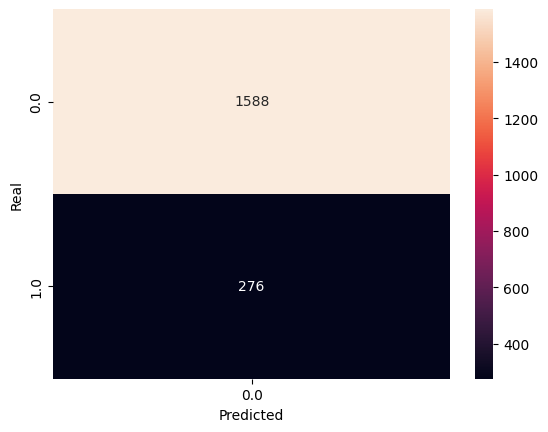

In [31]:
#Matriz de confusión

import seaborn as sns

data = {'y_Real':  y_test,
        'y_Prediccion': y_pred_test[4]
        }

df = pd.DataFrame(data)
confusion_matrix = pd.crosstab(df['y_Real'], df['y_Prediccion'], rownames=['Real'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()
